In [2]:
import pandas as pd
import random

# Создание данных о товарах
n_products = 100  # Количество товаров
products = []
categories = ['Электроника', 'Одежда', 'Бытовая техника', 'Спорт', 'Красота']

for i in range(1, n_products + 1):
    product = {
        'ID_товара': i,
        'Название_товара': f'Товар_{i}',
        'Цена': round(random.uniform(10, 500), 2),
        'Количество_продаж': random.randint(1, 100),
        'Категория': random.choice(categories),
        'Оценка_клиентов': round(random.uniform(1, 5), 1),
        'Вес_г': random.uniform(50, 5000),  # Генерация случайного веса в граммах
        'Размер': f'{random.randint(1, 10)}x{random.randint(1, 10)}x{random.randint(1, 10)}'  # Генерация случайного размера
    }
    products.append(product)

# Создание DataFrame и сохранение данных в CSV
df = pd.DataFrame(products)
df.to_csv('данные_о_товарах.csv', index=False)


In [3]:
pip install matplotlib


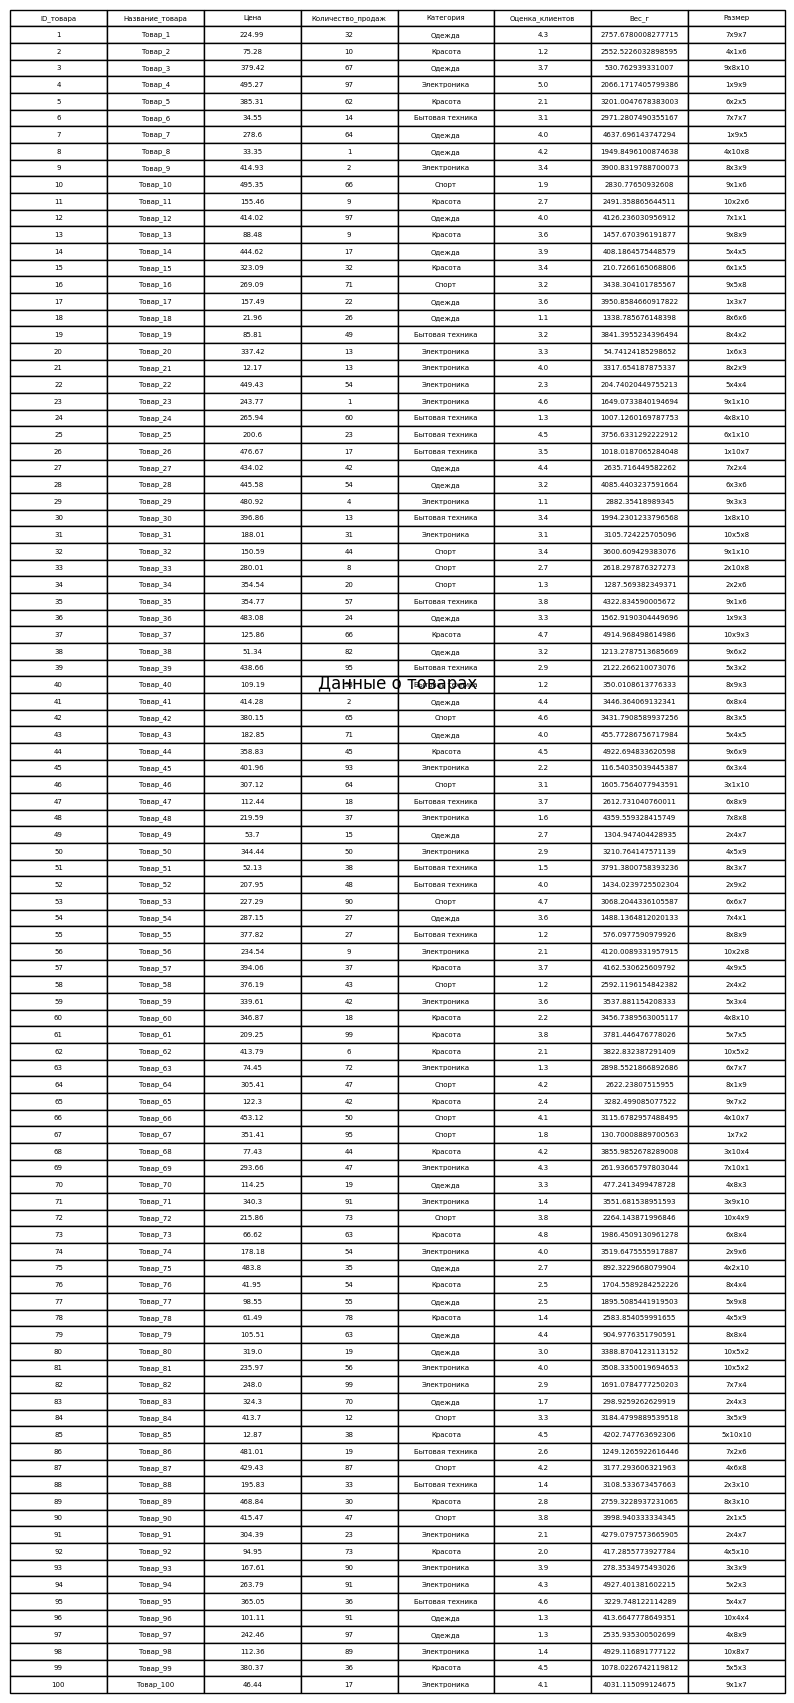

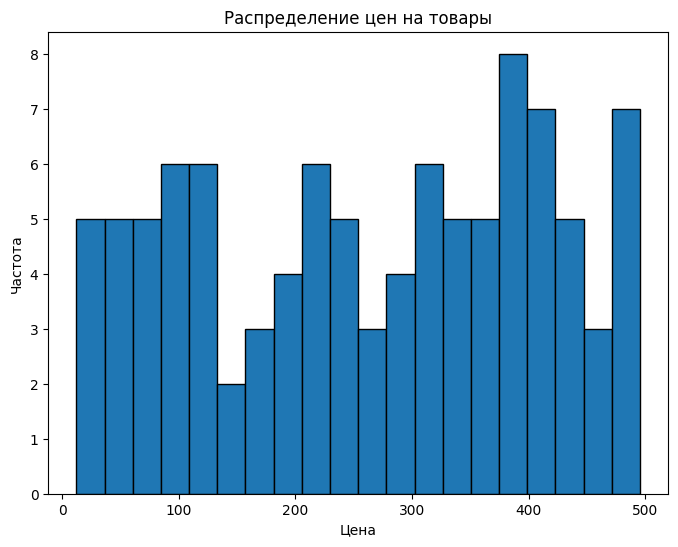

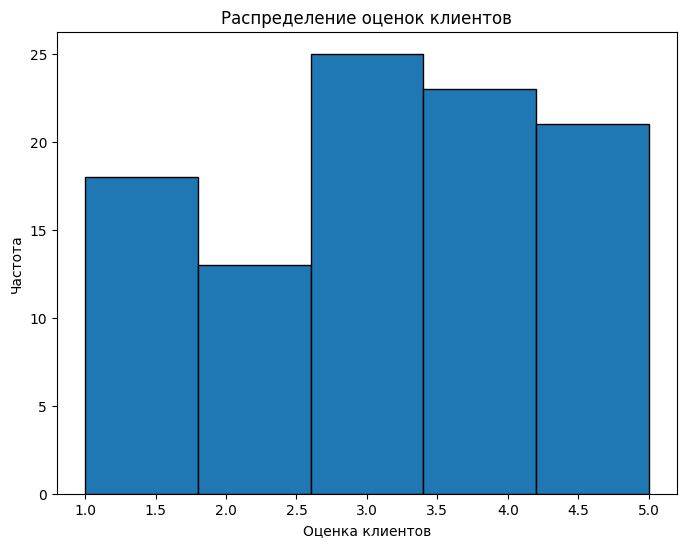

In [4]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Создание данных о товарах
n_products = 100  # Количество товаров
products = []
categories = ['Электроника', 'Одежда', 'Бытовая техника', 'Спорт', 'Красота']

for i in range(1, n_products + 1):
    product = {
        'ID_товара': i,
        'Название_товара': f'Товар_{i}',
        'Цена': round(random.uniform(10, 500), 2),
        'Количество_продаж': random.randint(1, 100),
        'Категория': random.choice(categories),
        'Оценка_клиентов': round(random.uniform(1, 5), 1),
        'Вес_г': random.uniform(50, 5000),
        'Размер': f'{random.randint(1, 10)}x{random.randint(1, 10)}x{random.randint(1, 10)}'
    }
    products.append(product)

# Создание DataFrame
df = pd.DataFrame(products)

# Визуализация таблицы
plt.figure(figsize=(10, 4))
plt.axis('off')  # Скрыть оси
plt.title('Данные о товарах')
plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
plt.show()

# График распределения цен
plt.figure(figsize=(8, 6))
plt.hist(df['Цена'], bins=20, edgecolor='k')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен на товары')
plt.show()

# График оценок клиентов
plt.figure(figsize=(8, 6))
plt.hist(df['Оценка_клиентов'], bins=5, range=(1, 5), edgecolor='k')
plt.xlabel('Оценка клиентов')
plt.ylabel('Частота')
plt.title('Распределение оценок клиентов')
plt.show()


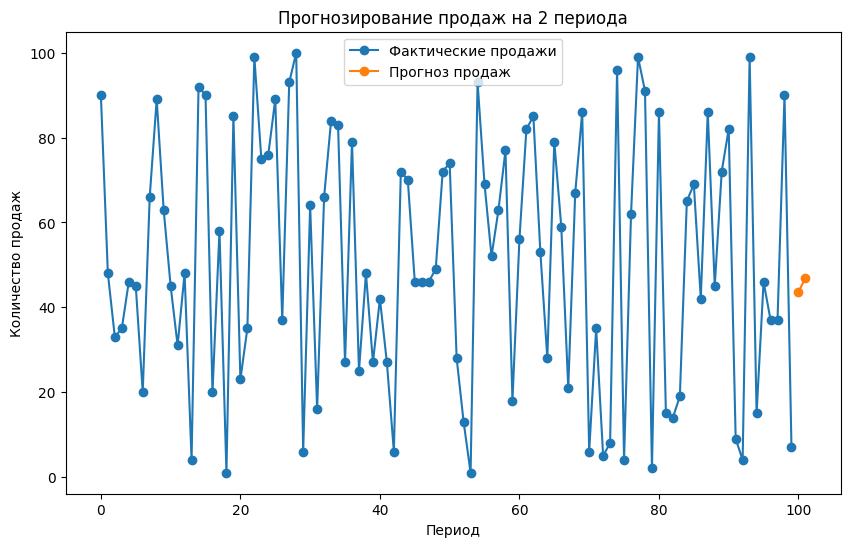

In [5]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Создание данных о товарах
n_products = 100  # Количество товаров
products = []
categories = ['Электроника', 'Одежда', 'Бытовая техника', 'Спорт', 'Красота']

for i in range(1, n_products + 1):
    product = {
        'ID_товара': i,
        'Название_товара': f'Товар_{i}',
        'Цена': round(random.uniform(10, 500), 2),
        'Количество_продаж': random.randint(1, 100),
        'Категория': random.choice(categories),
        'Оценка_клиентов': round(random.uniform(1, 5), 1),
        'Вес_г': random.uniform(50, 5000),
        'Размер': f'{random.randint(1, 10)}x{random.randint(1, 10)}x{random.randint(1, 10)}'
    }
    products.append(product)

# Создание DataFrame
df = pd.DataFrame(products)

# Прогнозирование продаж на 2 период
sales_data = df['Количество_продаж']
model = ExponentialSmoothing(sales_data, seasonal='add', seasonal_periods=12)
forecast = model.fit().forecast(steps=2)

# Визуализация прогноза
plt.figure(figsize=(10, 6))
plt.plot(sales_data, label='Фактические продажи', marker='o')
plt.plot(range(len(sales_data), len(sales_data) + 2), forecast, label='Прогноз продаж', marker='o')
plt.xlabel('Период')
plt.ylabel('Количество продаж')
plt.title('Прогнозирование продаж на 2 периода')
plt.legend()
plt.show()


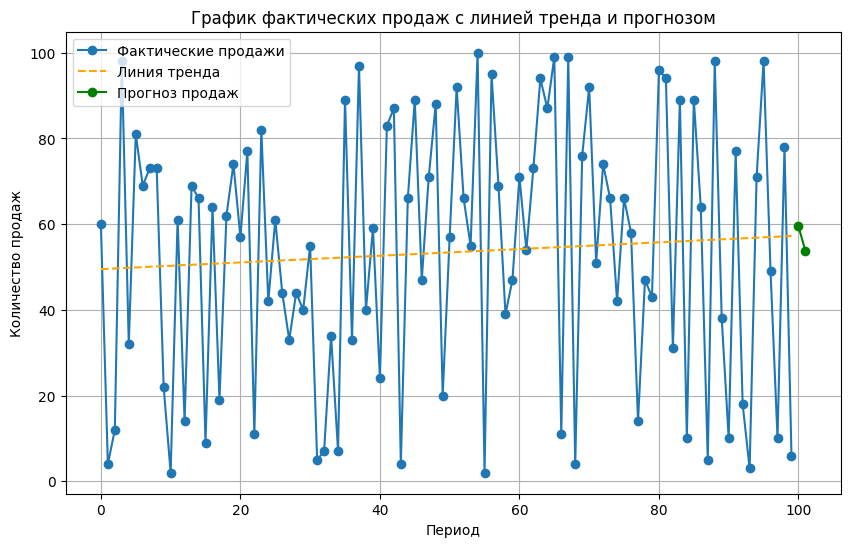

In [7]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import linregress

# Создание данных о товарах
n_products = 100  # Количество товаров
products = []
categories = ['Электроника', 'Одежда', 'Бытовая техника', 'Спорт', 'Красота']

for i in range(1, n_products + 1):
    product = {
        'ID_товара': i,
        'Название_товара': f'Товар_{i}',
        'Цена': round(random.uniform(10, 500), 2),
        'Количество_продаж': random.randint(1, 100),
        'Категория': random.choice(categories),
        'Оценка_клиентов': round(random.uniform(1, 5), 1),
        'Вес_г': random.uniform(50, 5000),
        'Размер': f'{random.randint(1, 10)}x{random.randint(1, 10)}x{random.randint(1, 10)}'
    }
    products.append(product)

# Создание DataFrame
df = pd.DataFrame(products)

# Линейная регрессия для линии тренда
x = np.arange(len(df))
y = df['Количество_продаж']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trend_line = intercept + slope * x

# Прогнозирование продаж на 2 периода
sales_data = df['Количество_продаж']
model = ExponentialSmoothing(sales_data, seasonal='add', seasonal_periods=12)
forecast = model.fit().forecast(steps=2)

# Визуализация графика с линией тренда и прогнозом
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Количество_продаж'], marker='o', label='Фактические продажи')
plt.plot(x, trend_line, '--', label='Линия тренда', color='orange')
plt.plot(range(len(sales_data), len(sales_data) + 2), forecast, label='Прогноз продаж', marker='o', color='green')
plt.xlabel('Период')
plt.ylabel('Количество продаж')
plt.title('График фактических продаж с линией тренда и прогнозом')
plt.legend()
plt.grid(True)
plt.show()
